<h1 id="Contents">Contents<a href="#Contents"></a></h1>
        <ol>
        <li><a class="" href="#Imports">Imports</a></li>
<li><a class="" href="#Defining-the-Data-Directory-and-Result-Directory">Defining the Data Directory and Result Directory</a></li>
<li><a class="" href="#Extracting-Center-Information">Extracting Center Information</a></li>
<ol><li><a class="" href="#Initializing-the-Classes">Initializing the Classes</a></li>
<li><a class="" href="#Determining-the-Region-of-Interest">Determining the Region of Interest</a></li>
<li><a class="" href="#Reiniatilizing-the-Classes">Reiniatilizing the Classes</a></li>
<li><a class="" href="#Setting-the-Reference-Image">Setting the Reference Image</a></li>
<li><a class="" href="#Extracting-Center-Related-Information">Extracting Center Related Information</a></li>
<li><a class="" href="#Some-Preliminary-Analysis">Some Preliminary Analysis</a></li>
<ol><li><a class="" href="#None-Values">None Values</a></li>
<li><a class="" href="#Sample-Images">Sample Images</a></li>
</ol></ol><li><a class="" href="#Extracting-Informations-From-DataFrame">Extracting Informations From DataFrame</a></li>
<ol><li><a class="" href="#Frame-Informations">Frame Informations</a></li>
<ol><li><a class="" href="#Information-About-DataFrame">Information About DataFrame</a></li>
<li><a class="" href="#Information-about-Frames-Numbers">Information about Frames Numbers</a></li>
<ol><li><a class="" href="#Getting-Numerical-Frame-Number">Getting Numerical Frame Number</a></li>
</ol><li><a class="" href="#Creating-New-Columns">Creating New Columns</a></li>
<ol><li><a class="" href="#The-Region-and-Time">The Region and Time</a></li>
<li><a class="" href="#The-Speeds">The Speeds</a></li>
<li><a class="" href="#Angle">Angle</a></li>
</ol><li><a class="" href="#Extracting-Values">Extracting Values</a></li>
<ol><li><a class="" href="#Height">Height</a></li>
<li><a class="" href="#Angles">Angles</a></li>
<li><a class="" href="#Speeds">Speeds</a></li>
</ol></ol></ol><li><a class="" href="#Fitting-Curves">Fitting Curves</a></li>
<ol><li><a class="" href="#The-Curves-to-be-Fitted">The Curves to be Fitted</a></li>
<li><a class="" href="#Region-III">Region III</a></li>
<ol><li><a class="" href="#Data-For-Region-III">Data For Region III</a></li>
<li><a class="" href="#Fitting-the-Curves-In-Region-III">Fitting the Curves In Region III</a></li>
<li><a class="" href="#Caparing-Results-For-Region-III">Caparing Results For Region III</a></li>
<li><a class="" href="#Calculating-Informations-From-Parameters-In-Region-III">Calculating Informations From Parameters In Region III</a></li>
<ol><li><a class="" href="#The-Speeds-In-Region-III">The Speeds In Region III</a></li>
<li><a class="" href="#The-Angle-In-Region-III">The Angle In Region III</a></li>
</ol><li><a class="" href="#Visualizating-Results-In-Region-III">Visualizating Results In Region III</a></li>
<ol><li><a class="" href="#x-and-y-Coordinates-In-Region-III">x and y Coordinates In Region III</a></li>
<li><a class="" href="#Speeds-In-Region-III">Speeds In Region III</a></li>
<li><a class="" href="#Angle-In-Region-III">Angle In Region III</a></li>
</ol><li><a class="" href="#Getting-The-Required-Informations-In-Region-III">Getting The Required Informations In Region III</a></li>
<li><a class="" href="#Adding-the-Information-for-Region-III-to-DataFrame">Adding the Information for Region III to DataFrame</a></li>
</ol><li><a class="" href="#Region-I">Region I</a></li>
<ol><li><a class="" href="#Data-For-Region-I">Data For Region I</a></li>
<li><a class="" href="#Fitting-the-Curves">Fitting the Curves</a></li>
<li><a class="" href="#Caparing-Results">Caparing Results</a></li>
<li><a class="" href="#Calculating-Informations-From-Parameters">Calculating Informations From Parameters</a></li>
<ol><li><a class="" href="#The-Speeds">The Speeds</a></li>
<li><a class="" href="#The-Angle">The Angle</a></li>
</ol><li><a class="" href="#Visualizating-Results">Visualizating Results</a></li>
<ol><li><a class="" href="#x-and-y-Coordinates">x and y Coordinates</a></li>
<li><a class="" href="#Speeds">Speeds</a></li>
<li><a class="" href="#Angle">Angle</a></li>
</ol><li><a class="" href="#Getting-The-Required-Informations">Getting The Required Informations</a></li>
</ol></ol><li><a class="" href="#Adding-the-Additional-Information">Adding the Additional Information</a></li>
<ol><li><a class="" href="#Saving-Informations-to-DataFrame">Saving Informations to DataFrame</a></li>
<li><a class="" href="#The-Text-Information">The Text Information</a></li>
<ol><li><a class="" href="#Creating-the-Text">Creating the Text</a></li>
<li><a class="" href="#Save-the-DataFrames">Save the DataFrames</a></li>
</ol>

# Imports

In [1]:
from extract_center import CenterExtracter
from run import Run
from misc_tools import Plotter, Smoother
from functools import partial
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import warnings

warnings.filterwarnings("ignore")
plt.rcdefaults()
matplotlib.rcParams["figure.figsize"] = (8, 6)


# Defining the Data Directory and Result Directory


In [2]:
sequence = "theta6_pass"
DATA_DIR = "../../data/extracted_images/" + sequence
RESULT_DIR = "../../data/results/" + sequence

# Extracting Center Information


## Initializing the Classes


In [3]:
run = Run(DATA_DIR, RESULT_DIR)
ce = CenterExtracter()

## Determining the _Region of Interest_


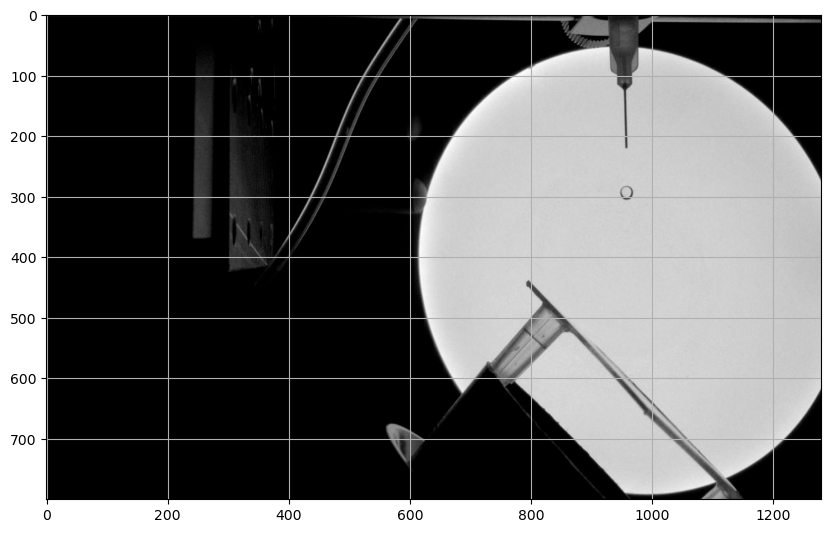

In [4]:
images = run.get_images()
img_1 = ce._read_image(images[0])
ce._show_image(img_1)


In [5]:
region_of_interset = (900, 250, 1000, 350)

## Reiniatilizing the Classes


In [6]:
run = Run(DATA_DIR, RESULT_DIR, region=region_of_interset)

## Setting the Reference Image


In [7]:
run._set_ref_image(115)

## Extracting Center Related Information


In [9]:
dynamic_cropping = True
if dynamic_cropping:
    file_name = "dynamic_ap.csv"
    df_name = "/dynamic_ap.csv"
else:
    file_name = "ap"
    df_name = "/centers_using_ap.csv"
df = run.all_points(
    crop_included=True,
    binary=True,
    verbose=False,
    # num_images=None,
    raise_error=False,
    file_name=file_name,
    dynamic_cropping=dynamic_cropping
,
)


Getting list of images...


Extracting data from images...: 100%|██████████| 121/121 [00:03<00:00, 40.16it/s]

Saving to csv...
Done!


## Some Preliminary Analysis


### None Values


In [10]:
df.isna().sum()


id        0
x        29
y        29
r1       29
r2       29
theta    29
dtype: int64

In [11]:
none_values = df.isna().sum()["x"]
total_frames = len(df)
unrealistic = len(
    df[((df["r1"] + df["r2"]) / 2 > 20) | ((df["r1"] + df["r2"]) / 2 < 5)]
)


In [12]:
none_values, unrealistic

(29, 7)

In [13]:
df = pd.read_csv(RESULT_DIR + df_name)

### Sample Images


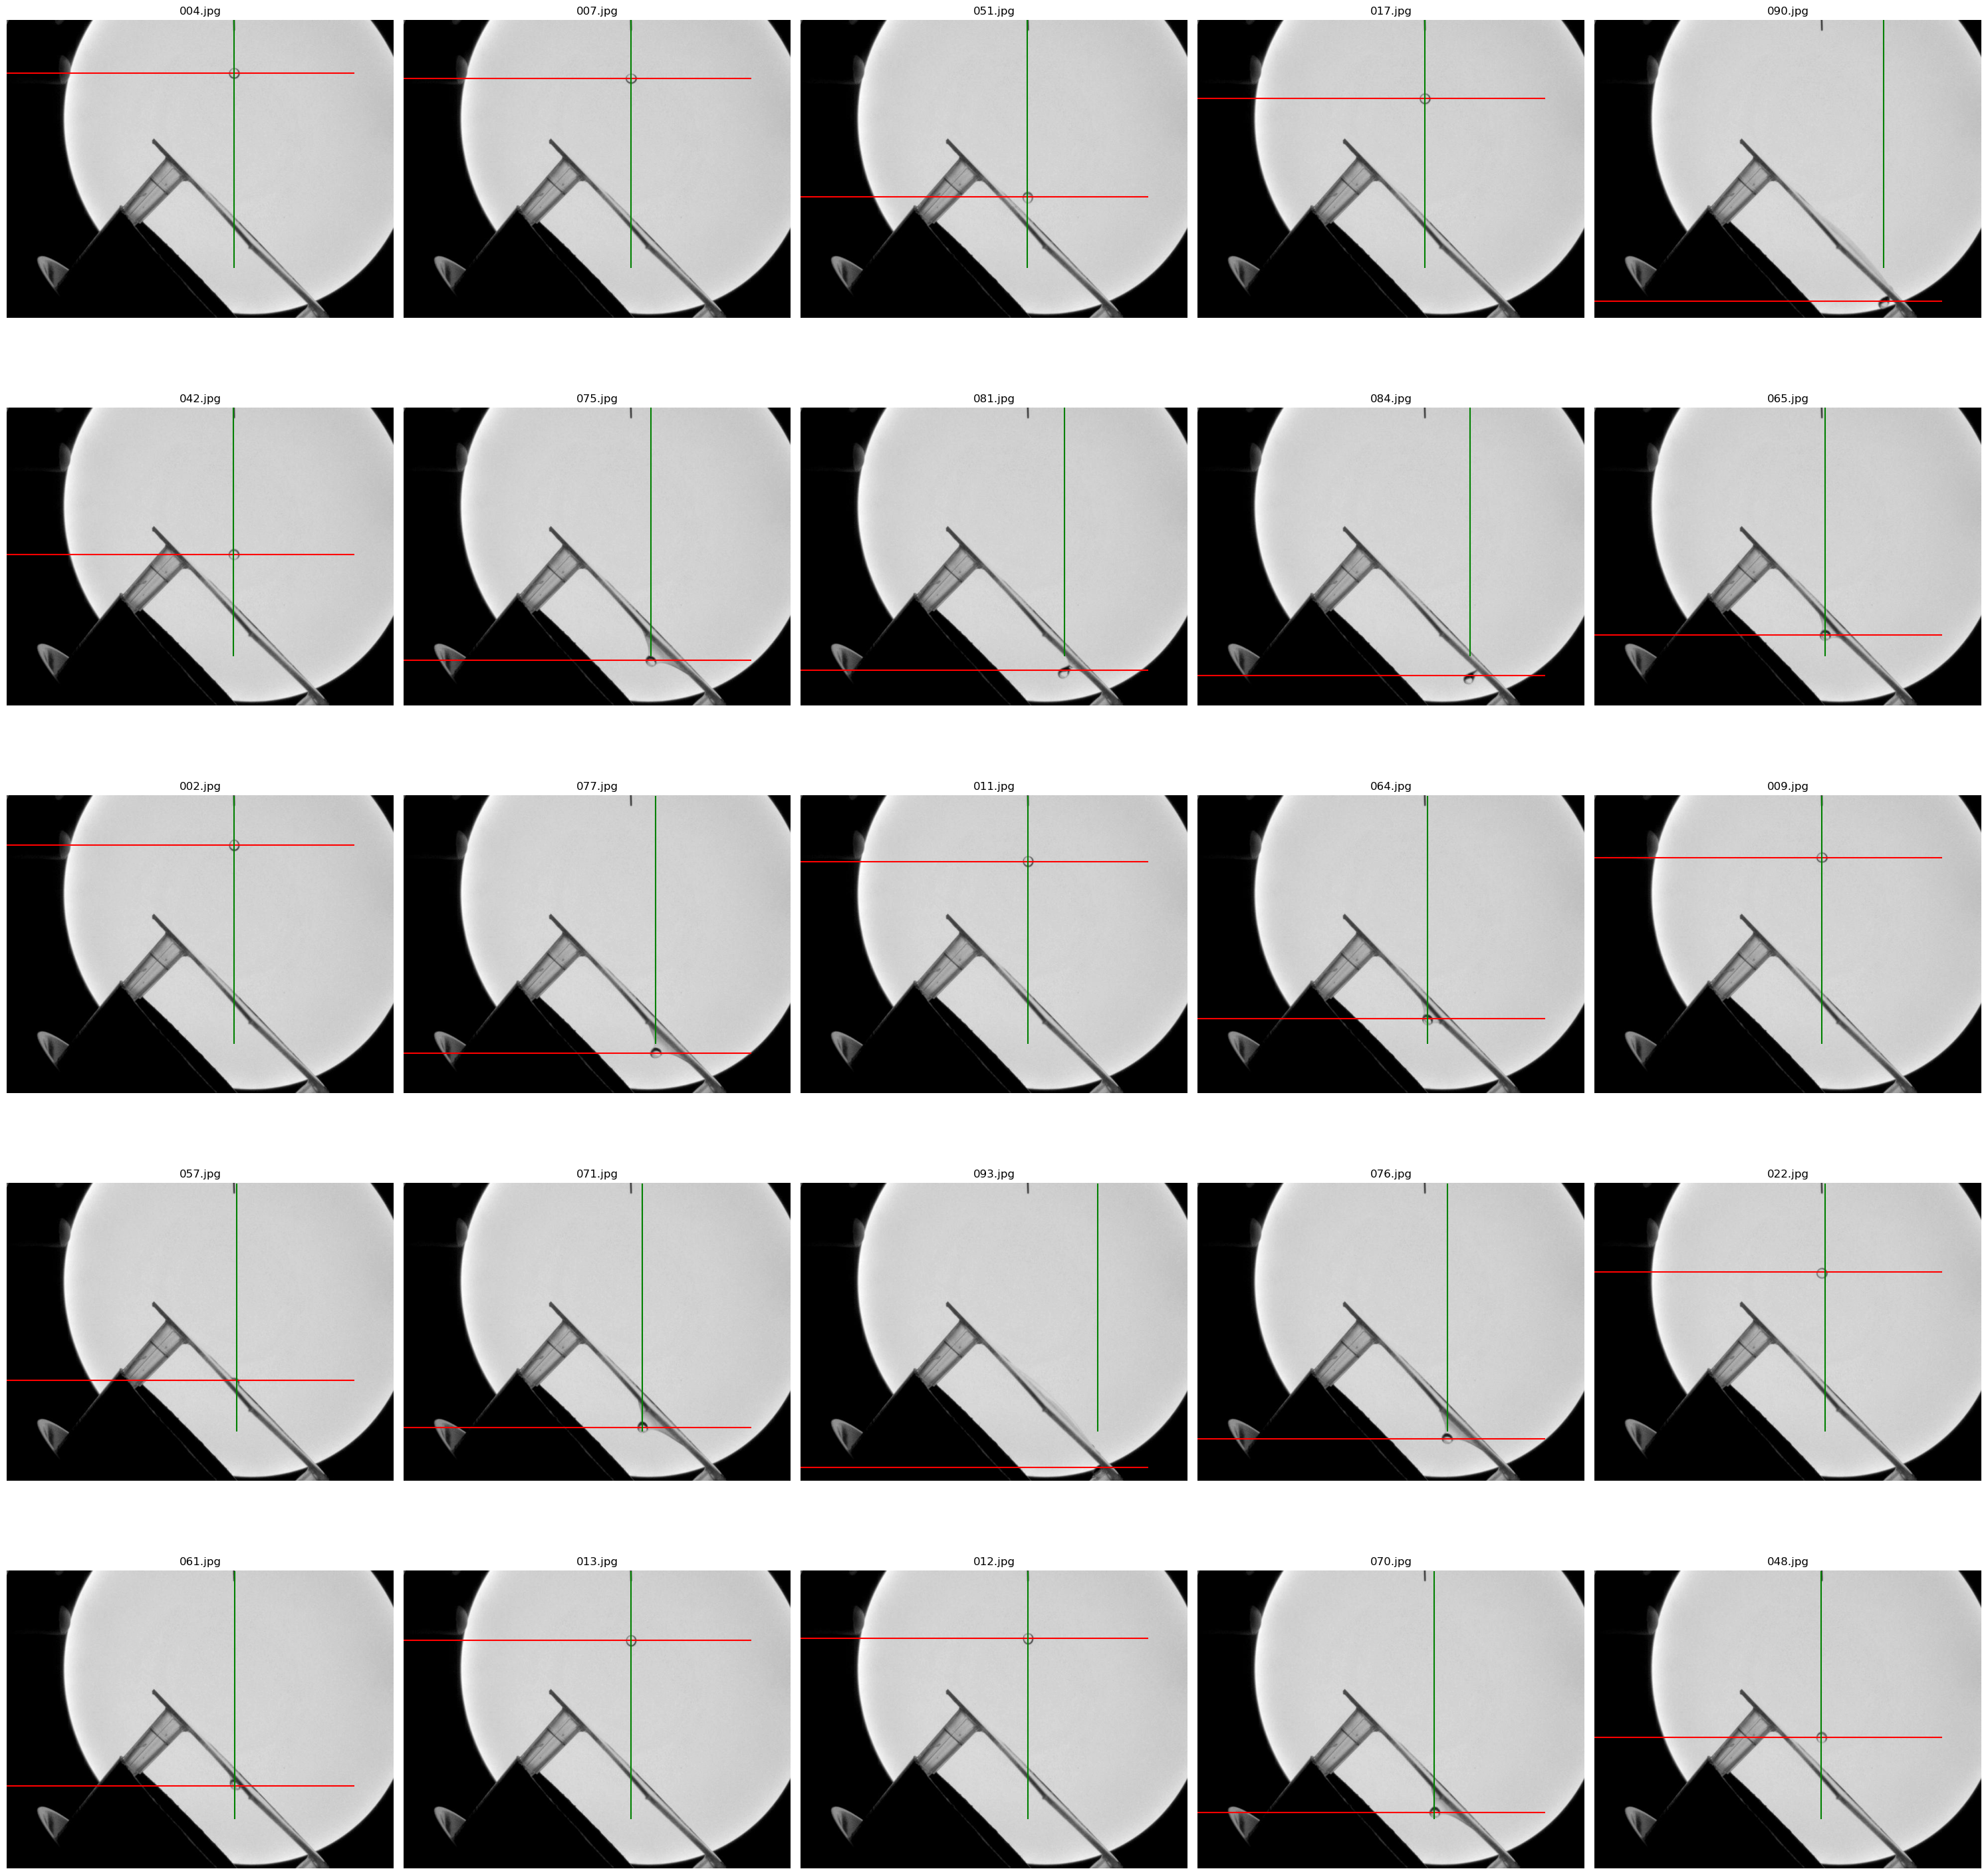

In [14]:
p = Plotter(df, RESULT_DIR)
p.get_samples(25, file_name=f"{sequence}_samples.png")


# Extracting Informations From DataFrame


## Frame Informations


### Information About DataFrame


In [15]:
df = pd.read_csv(RESULT_DIR + df_name)

In [16]:
none_frames = df.isna().sum()["x"]
total_frames = len(df)
unrealistic = len(
    df[((df["r1"] + df["r2"]) / 2 > 20) | ((df["r1"] + df["r2"]) / 2 < 5)]
)


### Information about Frames Numbers


In [17]:
info_dict = {
    "first_frame": 1,
    "last_frame": 2,
    "contact_frame": 3,
    "leave_frame": 4,
    "angle": 5,
    "passthrough": 6,
}


In [18]:
def get_info(file):
    information = {}
    with open(file, "r") as f:
        texts = f.readlines()
    for key, value in info_dict.items():
        line = texts[value]
        info = line.split(":")[1].strip()
        information[key] = info
    return information


information = get_info(f"{DATA_DIR}.txt")


In [19]:
first_frame = DATA_DIR + "/" + information["first_frame"]
last_frame = DATA_DIR + "/" + information["last_frame"]
contact_frame = DATA_DIR + "/" + information["contact_frame"]
angle = information["angle"]
leave_frame = DATA_DIR + "/" + information["leave_frame"]
passthrough = information["passthrough"]


#### Getting Numerical Frame Number


In [20]:
reg = re.compile(r"\d{2,3}")
first_frame_num = int(reg.findall(first_frame)[0])
contact_frame_num = int(reg.findall(contact_frame)[0])
leave_frame_num = int(reg.findall(leave_frame)[0])
last_frame_num = int(reg.findall(last_frame)[0])
first_frame_num, contact_frame_num, leave_frame_num, last_frame_num


(0, 55, 85, 92)

In [21]:
df = df.loc[:last_frame_num]

## Creating New Columns


### The Region and Time


In [22]:
s = Smoother(df)
df_s = s.smoothen(remove_noise=False)
df_c = df[df["x"].notna()]

In [23]:
def get_region(id):
    id = id.split("/")[-1].split(".")[0]
    id = int(id)
    if id<=first_frame_num:
        return "O"
    elif id>=first_frame_num and id<=contact_frame_num:
        return "I"
    elif id>=contact_frame_num and id<=leave_frame_num:
        return "II"
    else:
        return "III"


In [24]:
df_c["Region"] = df_c["id"].apply(get_region)
df_s["Region"] = df_s["id"].apply(get_region)


In [25]:
def get_time(id):
    id = id.split("/")[-1].split(".")[0]
    id = int(id)
    return id


In [26]:
df_c["time"] = df_c["id"].apply(get_time)
df_s["time"] = df_s["id"].apply(get_time)


### The Speeds


In [27]:
df_s["vx"] = df_s["x"].diff(7) / 7
df_s["vy"] = df_s["y"].diff(7) / 7
df_s.fillna(0, inplace=True)
df_s["vx"] = df_s["vx"].astype(float)
df_s["vy"] = df_s["vy"].astype(float)
df_s["v"] = np.sqrt(df_s["vx"] ** 2 + df_s["vy"] ** 2)

df_c["vx"] = df_c["x"].diff(7) / 7
df_c["vy"] = df_c["y"].diff(7) / 7
df_c.fillna(0, inplace=True)
df_c["vx"] = df_c["vx"].astype(float)
df_c["vy"] = df_c["vy"].astype(float)
df_c["v"] = np.sqrt(df_c["vx"] ** 2 + df_c["vy"] ** 2)


In [37]:
# plt.plot(df_s["vy"], label = "smoothened")
# plt.plot(df_c["vy"], label = "raw")
# plt.legend();


In [38]:
# plt.plot(df_s["v"], label = "smoothened")
# plt.plot(df_c["v"], label = "raw")
# plt.legend();


### Angle


In [28]:
def get_angle(row):
    vx = row["vx"]
    vy = -row["vy"]
    if vx == 0 and vy == 0:
        return 0
    elif vx == 0:
        return 90
    else:
        return np.arctan(vy / vx) * 180 / np.pi


In [29]:
df_s["angle"] = df_s.apply(get_angle, axis=1)
df_c["angle"] = df_c.apply(get_angle, axis=1)


In [30]:
# plt.plot(df_s["angle"], label = "smoothened")
# plt.plot(df_c["angle"], label = "raw")
# plt.legend();


## Extracting Values


### Height


In [31]:
y0 = df_c[df_c["time"] == first_frame_num]["y"].values[0]
yc = df_c[df_c["time"] == contact_frame_num]["y"].values[0]
hc = yc - y0

y0 = df_s[df_s["time"] == first_frame_num]["y"].values[0]
ys = df_s[df_s["time"] == contact_frame_num]["y"].values[0]
hs = ys - y0
hc, hs


(290.0, 297.70807335980334)

### Angles


In [32]:
df_c[df_c["time"] == contact_frame_num].T


55
id      ../../data/extracted_images/theta6_pass/055.jpg
x                                                 957.0
y                                                 584.0
r1                                                  9.0
r2                                                  6.0
theta                                          5.729578
Region                                                I
time                                                 55
vx                                                  0.0
vy                                             6.857143
v                                              6.857143
angle                                              90.0

In [33]:
df_c[df_c["time"] == leave_frame_num].T


85
id      ../../data/extracted_images/theta6_pass/085.jpg
x                                                1056.0
y                                                 744.0
r1                                                  6.0
r2                                                 15.0
theta                                         61.306484
Region                                               II
time                                                 85
vx                                             6.142857
vy                                                  3.0
v                                              6.836278
angle                                        -26.029592

In [34]:
df_s[df_s["time"] == contact_frame_num].T


55
id      ../../data/extracted_images/theta6_pass/055.jpg
x                                            956.920023
y                                            591.708073
r1                                             8.463226
r2                                              7.99187
theta                                          36.23067
r                                              7.930611
Region                                                I
time                                                 55
vx                                             0.122735
vy                                             7.881749
v                                              7.882705
angle                                        -89.107863

In [35]:
df_s[df_s["time"] == leave_frame_num].T


85
id      ../../data/extracted_images/theta6_pass/085.jpg
x                                           1053.203063
y                                            747.577425
r1                                             9.428625
r2                                            11.874078
theta                                         44.055894
r                                              9.992059
Region                                               II
time                                                 85
vx                                             5.501256
vy                                             3.531102
v                                               6.53701
angle                                         -32.69527

In [36]:
angle_at_contact_frame_s = df_s.loc[contact_frame_num]["angle"]
angle_at_leave_frame_s = df_s.loc[leave_frame_num]["angle"]

angle_at_contact_frame_c = df_c.loc[contact_frame_num]["angle"]
angle_at_leave_frame_c = df_c.loc[leave_frame_num]["angle"]


if angle_at_contact_frame_s < 0:
    angle_at_contact_frame_s = 180 + angle_at_contact_frame_s

if angle_at_contact_frame_c < 0:
    angle_at_contact_frame_c = 180 + angle_at_contact_frame_c


angle_at_contact_frame_c, angle_at_contact_frame_s, angle_at_leave_frame_c, angle_at_leave_frame_s


(90.0, 90.89213717739601, -26.029592191513455, -32.695270110488764)

### Speeds


In [37]:
velocity_at_leave_frame_s = df_s.loc[leave_frame_num]["v"]
velocity_at_contact_frame_s = df_s.loc[contact_frame_num]["v"]
velocity_at_leave_frame_s, velocity_at_contact_frame_s

(6.537010071914652, 7.88270473532351)

In [38]:
velocity_at_leave_frame_c = df_c.loc[leave_frame_num]["v"]
velocity_at_contact_frame_c = df_c.loc[contact_frame_num]["v"]
velocity_at_leave_frame_c, velocity_at_contact_frame_c


(6.836277779431657, 6.857142857142857)

In [39]:
x_velocity_at_leave_frame_s = df_s.loc[leave_frame_num]["vx"]
x_velocity_at_contact_frame_s = df_s.loc[contact_frame_num]["vx"]
y_velocity_at_leave_frame_s = df_s.loc[leave_frame_num]["vy"]
y_velocity_at_contact_frame_s = df_s.loc[contact_frame_num]["vy"]
print(
    x_velocity_at_leave_frame_s,
    x_velocity_at_contact_frame_s,
    y_velocity_at_leave_frame_s,
    y_velocity_at_contact_frame_s,
)

x_velocity_at_leave_frame_c = df_c.loc[leave_frame_num]["vx"]
x_velocity_at_contact_frame_c = df_c.loc[contact_frame_num]["vx"]
y_velocity_at_leave_frame_c = df_c.loc[leave_frame_num]["vy"]
y_velocity_at_contact_frame_c = df_c.loc[contact_frame_num]["vy"]
print(
    x_velocity_at_leave_frame_c,
    x_velocity_at_contact_frame_c,
    y_velocity_at_leave_frame_c,
    y_velocity_at_contact_frame_c,
)


5.501255976014916 0.12273451638173226 3.5311022877670633 7.881749182940309
6.142857142857143 0.0 3.0 6.857142857142857


# Fitting Curves


## The Curves to be Fitted


We'll assume that downward is the positive direction. In this way, the gravitational acceleration is positive. In x direction, no force is acting and hence the equation of motion is simply:

$$
x(t) = x_0 + v_{x0}t
$$

Here $x_0$ is the initial x position, $v_{x0}$ is the initial y velocity.


Now, in y direction, the equation of motion is:

$$
y(t) = y_0 + v_{y0}t + \frac{1}{2}gt^2
$$

Here, $y_0$ is the initial y position, $v_{y0}$ is the initial y velocity, and $g$ is the acceleration due to gravity.


We'll optimize these two equations to get the initial velocity and the initial position for x and y direction.


We can also phrase the same problem by eliminating $t$ from the equation of motions. This way, we'll get $y$ as a function of $x$. Eliminating $t$ from the equation of motion, we get:

$$
y = y_0 + \frac{v_y}{v_x}(x - x_0) + \frac{1}{2}g\frac{(x - x_0)^2}{v_x^2}
$$


Here, we have rewritten $v_{x0}$ as $v_x$ and $v_{y0}$ as $v_y$.

<!-- Defining $\frac{v_y}{v_x}$ as $m$, which is nothing but $\tan(\theta)$ where $\theta$ is the angle between the y and x velocity, we get:
$$
y = y_0 + m(x - x_0) + \frac{1}{2}g\frac{(x - x_0)^2}{v_x^2}
$$ -->


This is a parabola with the parameters $x_0$, $y_0$, $v_y$, $v_x$ and $g$. We can use `scipy` to get these parameters. However, as we already know the values of $x_0$ and $y_0$ with reasonable accuracy, we'll use them.


Similarly, fitting the first two equations gives the same parameters.


In [40]:
def the_parabola_to_fit(x, m, a, x0, y0):
    second_term = (m) * (x - x0)
    third_term = a * ((x - x0) ** 2)
    return y0 + second_term + third_term


def parametric_x_to_fit(t, vx0, x0):
    return x0 + vx0 * t


def parametric_y_to_fit(t, vy0, g, y0):
    return y0 + vy0 * t + 0.5 * g * t**2


## Region III


### Data For Region III


In [41]:
region_3 = df_c[df_c["Region"] == "III"]


In [42]:
X = region_3["x"].values
x0 = X[0]
Y = region_3["y"].values
y0 = Y[0]
t = region_3["time"].values
offset = t[0]
tbar = t - offset


In [43]:
x0, y0


(1061.0, 748.0)

In [44]:
tbar


array([0, 1, 2, 3, 4, 5, 6])

### Fitting the Curves In Region III


In [45]:
the_parabola = partial(the_parabola_to_fit, x0=x0, y0=y0)
parametric_x = partial(parametric_x_to_fit, x0=x0)
parametric_y = partial(parametric_y_to_fit, y0=y0)
the_parabola_vector = np.vectorize(the_parabola)
parametric_x_vector = np.vectorize(parametric_x)
parametric_y_vector = np.vectorize(parametric_y)


In [46]:
popt, pcov = curve_fit(the_parabola, X, Y)
popty, pcovy = curve_fit(parametric_y, tbar, Y)
poptx, pcovx = curve_fit(parametric_x, tbar, X)


In [47]:
popt, popty, poptx


(array([ 0.87552355, -0.00320879]),
 array([ 5.95535714, -0.58928571]),
 array([5.7032967]))

### Caparing Results For Region III


Using

$$
m = \frac{v_y}{v_x}\\
a = \frac{g}{2v_x^2}
$$

we can check whether the parameters by both the equations are the same.


In [48]:
m_by_parametric = popty[0] / poptx[0]
m_by_parabola = popt[0]
m_by_parametric, m_by_parabola


(1.0441955684007878, 0.8755235453432375)

In [49]:
a_by_parametric = popty[1] / poptx[0] ** 2 / 2
a_by_parabola = popt[1]
a_by_parametric, a_by_parabola


(-0.009058243398285492, -0.003208792576580688)

### Calculating Informations From Parameters In Region III

#### The Speeds In Region III


Next, we'll see how the calculated velocities are? The eqaution for the speeds are:

$$
v_x(t) = v_{x0}\\
v_y(t) = v_{y0} + gt
$$


In [50]:
vy = popty[0] + popty[1] * (tbar)
vx = np.ones(len(tbar)) * poptx[0]
v = np.sqrt(vy**2 + vx**2)


#### The Angle In Region III

Next, let's calculate the angle between the x and y velocity.


In [51]:
angles = np.arctan(vy / vx) * 180 / np.pi


### Visualizating Results In Region III


#### x and y Coordinates In Region III


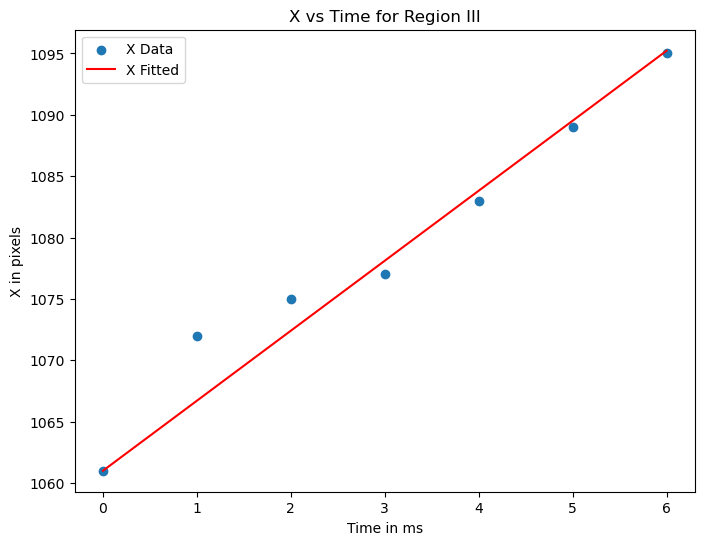

In [52]:
plt.scatter(tbar, X, label="X Data")
title = "X vs Time for Region III"
plt.plot(tbar, parametric_x_vector(tbar, *poptx), "r", label="X Fitted")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("X in pixels")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.show()


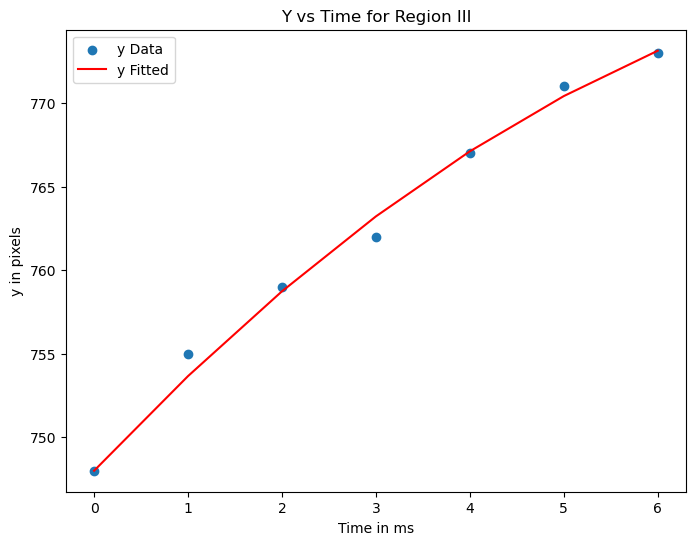

In [53]:
plt.scatter(tbar, Y, label="y Data")
title = "Y vs Time for Region III"
plt.plot(tbar, parametric_y_vector(tbar, *popty), "r", label="y Fitted")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("y in pixels")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.show()


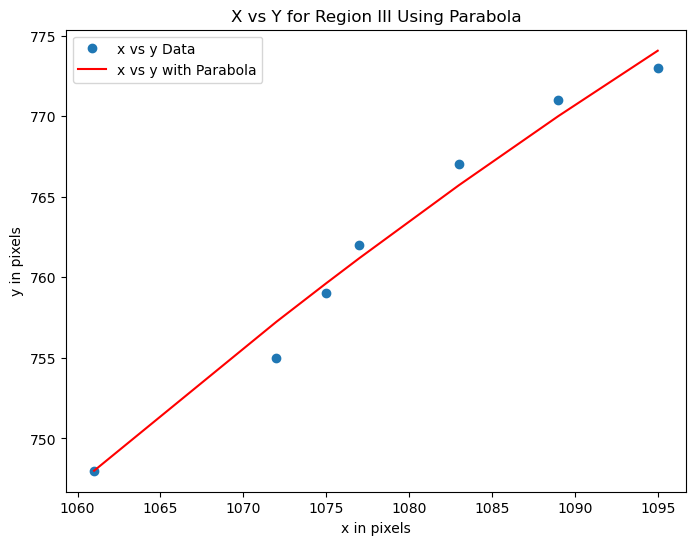

In [54]:
plt.plot(X, Y, "o", label="x vs y Data")
title = "X vs Y for Region III Using Parabola"
plt.plot(X, the_parabola_vector(X, *popt), "r", label="x vs y with Parabola")
plt.legend()
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.show()


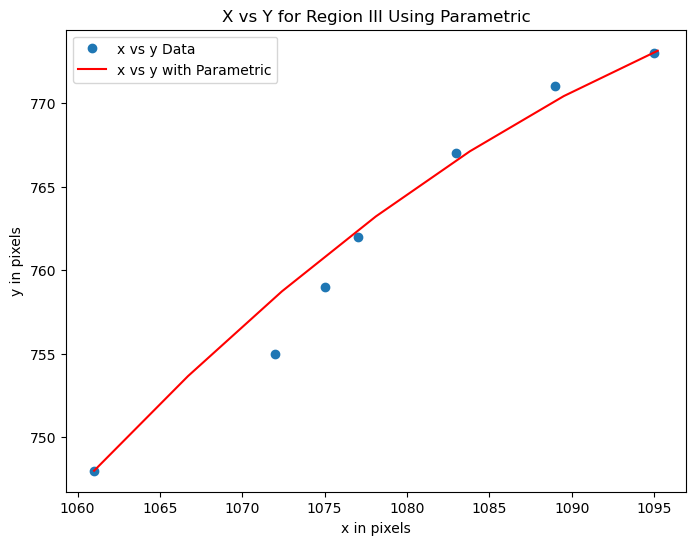

In [55]:
plt.plot(X, Y, "o", label="x vs y Data")
title = "X vs Y for Region III Using Parametric"
plt.plot(parametric_x_vector(tbar, *poptx), parametric_y_vector(tbar, *popty), "r", label="x vs y with Parametric")
plt.legend()
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.show()


#### Speeds In Region III


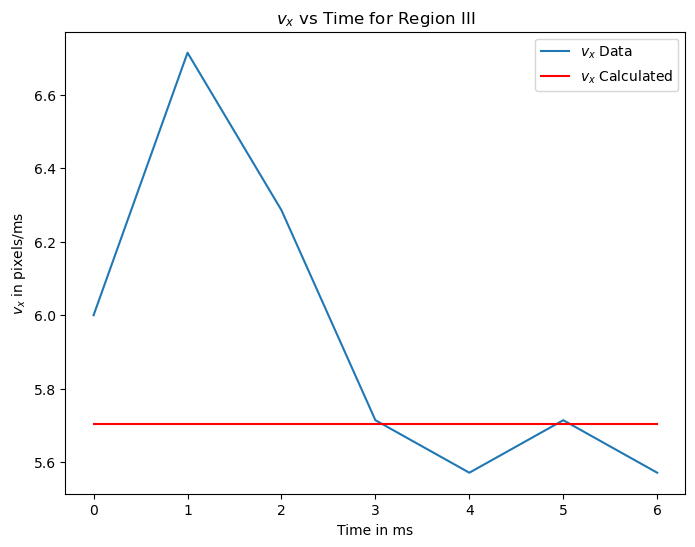

In [56]:
plt.plot(tbar, region_3["vx"].values, label="$v_x$ Data")
title = "$v_x$ vs Time for Region III"
plt.plot(tbar, vx, "r", label="$v_x$ Calculated")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("$v_x$ in pixels/ms")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_").replace("$", "") + ".png"
plt.savefig(save_name)
plt.show()


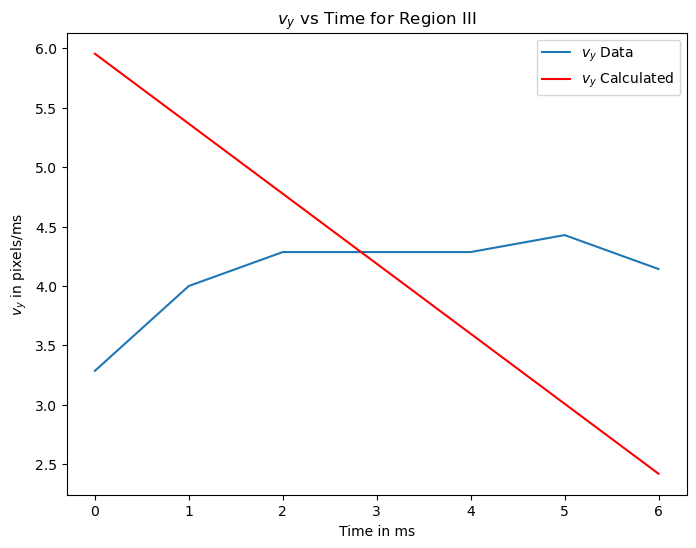

In [57]:
plt.plot(tbar, region_3["vy"].values, label="$v_y$ Data")
title = "$v_y$ vs Time for Region III"
plt.plot(tbar, vy, "r", label="$v_y$ Calculated")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("$v_y$ in pixels/ms")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_").replace("$", "") + ".png"
plt.savefig(save_name)
plt.show()


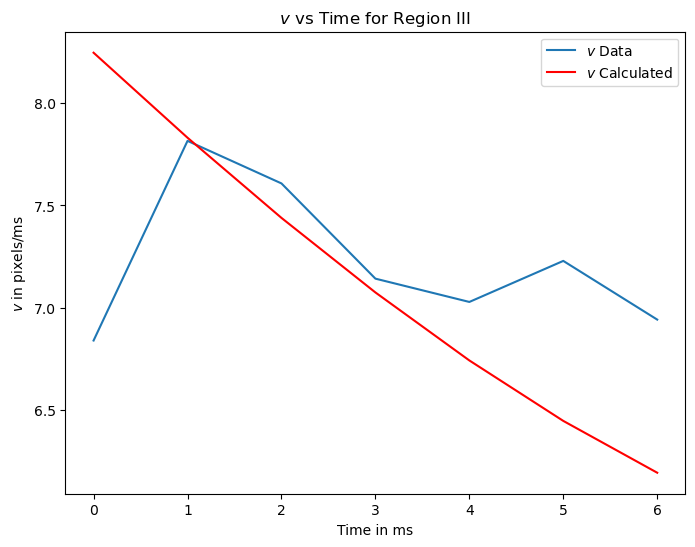

In [58]:
plt.plot(tbar, region_3["v"].values, label="$v$ Data")
title = "$v$ vs Time for Region III"
plt.plot(tbar, v, "r", label="$v$ Calculated")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("$v$ in pixels/ms")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_").replace("$", "") + ".png"
plt.savefig(save_name)
plt.show()


#### Angle In Region III


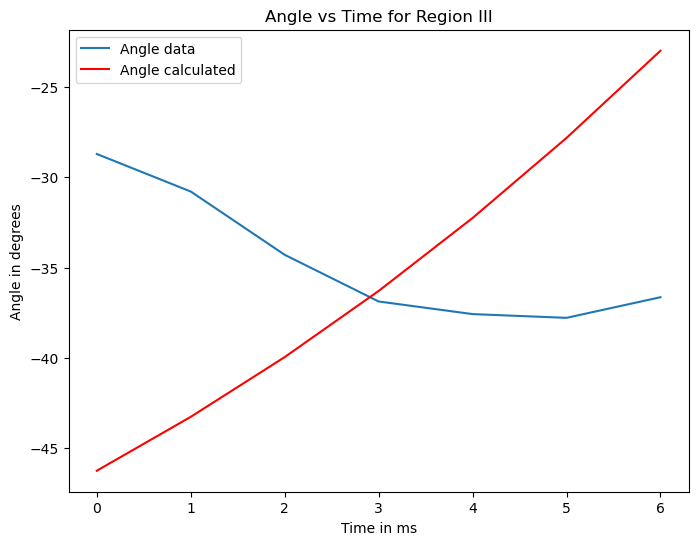

In [59]:
plt.plot(region_3["angle"].values, label="Angle data")
title = "Angle vs Time for Region III"
plt.plot(-angles, "r", label="Angle calculated")
plt.xlabel("Time in ms")
plt.ylabel("Angle in degrees")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.legend()
plt.show()


### Getting The Required Informations In Region III


In [60]:
g_raw = popty[1]
vx_using_curve = poptx[0]
vy_using_curve = popty[1]
v_using_curve = np.sqrt(vx_using_curve**2 + vy_using_curve**2)


In [61]:
fps = 1000
pixels = 0.011914
speed_conversion = pixels * fps
acceleration_conversion = pixels * fps**2
g_in_region_3 = g_raw * acceleration_conversion
g_in_region_3


-7020.750000041307

In [62]:
x_velocity_at_leave_frame_using_c = vx[0]
y_velocity_at_leave_frame_using_c = vy[0]
velocity_at_leave_frame_using_c = v[0]
angle_at_leave_frame_using_c = angles[0]
x_velocity_at_leave_frame_using_c, y_velocity_at_leave_frame_using_c, velocity_at_leave_frame_using_c, angle_at_leave_frame_using_c


(5.703296703306962, 5.9553571428679515, 8.245839677380369, 46.23854348909815)

### Adding the Information for Region III to DataFrame


In [63]:
new_info_df_for_region_3 = pd.DataFrame(
    {"vx": vx, "vy": vy, "v": v, "angle": angles, "time": t}
)
new_info_df_for_region_3.columns = [
    "vx_using_curve",
    "vy_using_curve",
    "v_using_curve",
    "angle_using_curve",
    "time",
]


## Region I


### Data For Region I


In [64]:
region_1 = df_c[df_c["Region"] == "I"]


In [65]:
X = region_1["x"].values
x0 = X[0]
Y = region_1["y"].values
y0 = Y[0]
t = region_1["time"].values
offset = t[0]
tbar = t - offset


In [66]:
x0, y0


(958.0, 297.0)

In [67]:
tbar


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54])

### Fitting the Curves


In [68]:
the_parabola = partial(the_parabola_to_fit, x0=x0, y0=y0)
parametric_x = partial(parametric_x_to_fit, x0=x0)
parametric_y = partial(parametric_y_to_fit, y0=y0)
the_parabola_vector = np.vectorize(the_parabola)
parametric_x_vector = np.vectorize(parametric_x)
parametric_y_vector = np.vectorize(parametric_y)


In [69]:
popt, pcov = curve_fit(the_parabola, X, Y)
popty, pcovy = curve_fit(parametric_y, tbar, Y)
poptx, pcovx = curve_fit(parametric_x, tbar, X)


In [70]:
popt, popty, poptx


(array([-135.48371365,   26.41478078]),
 array([3.15973086, 0.08087131]),
 array([0.00389213]))

### Caparing Results


Using

$$
m = \frac{v_y}{v_x}\\
a = \frac{g}{2v_x^2}
$$

we can check whether the parameters by both the equations are the same.


In [71]:
m_by_parametric = popty[0] / poptx[0]
m_by_parabola = popt[0]
m_by_parametric, m_by_parabola


(811.8251357379495, -135.48371364593686)

In [72]:
a_by_parametric = popty[1] / poptx[0] ** 2 / 2
a_by_parabola = popt[1]
a_by_parametric, a_by_parabola


(2669.2503487164527, 26.414780779985836)

### Calculating Informations From Parameters


#### The Speeds


Next, we'll see how the calculated velocities are? The eqaution for the speeds are:

$$
v_x(t) = v_{x0}\\
v_y(t) = v_{y0} + gt
$$


In [73]:
vy = popty[0] + popty[1] * (tbar)
vx = np.ones(len(tbar)) * poptx[0]
v = np.sqrt(vy**2 + vx**2)


#### The Angle


Next, let's calculate the angle between the x and y velocity.


In [74]:
angles = np.arctan(vy / vx) * 180 / np.pi


### Visualizating Results


#### x and y Coordinates


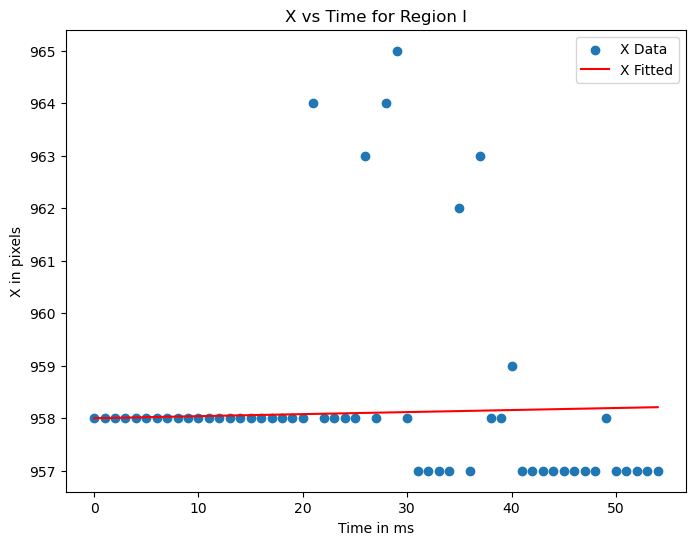

In [75]:
plt.scatter(tbar, X, label="X Data")
title = "X vs Time for Region I"
plt.plot(tbar, parametric_x_vector(tbar, *poptx), "r", label="X Fitted")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("X in pixels")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.show()


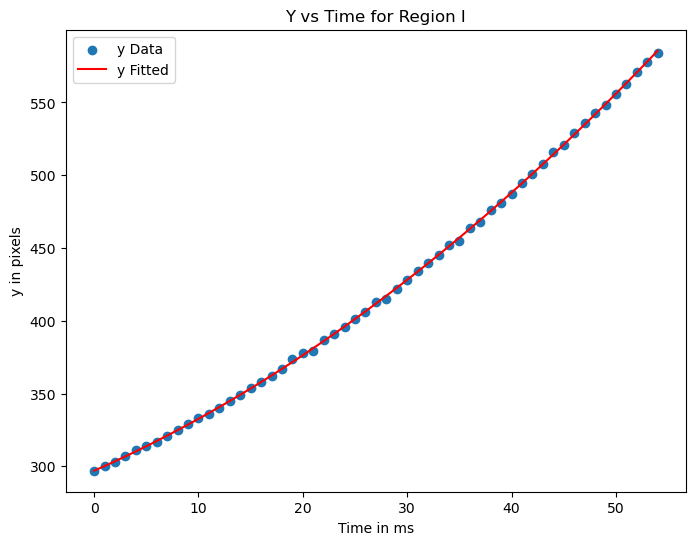

In [76]:
plt.scatter(tbar, Y, label="y Data")
title = "Y vs Time for Region I"
plt.plot(tbar, parametric_y_vector(tbar, *popty), "r", label="y Fitted")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("y in pixels")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.show()


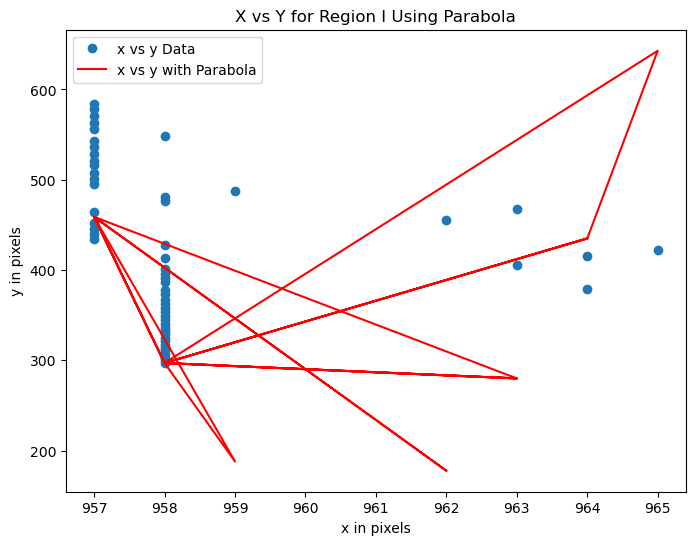

In [77]:
plt.plot(X, Y, "o", label="x vs y Data")
title = "X vs Y for Region I Using Parabola"
plt.plot(X, the_parabola_vector(X, *popt), "r", label="x vs y with Parabola")
plt.legend()
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.show()


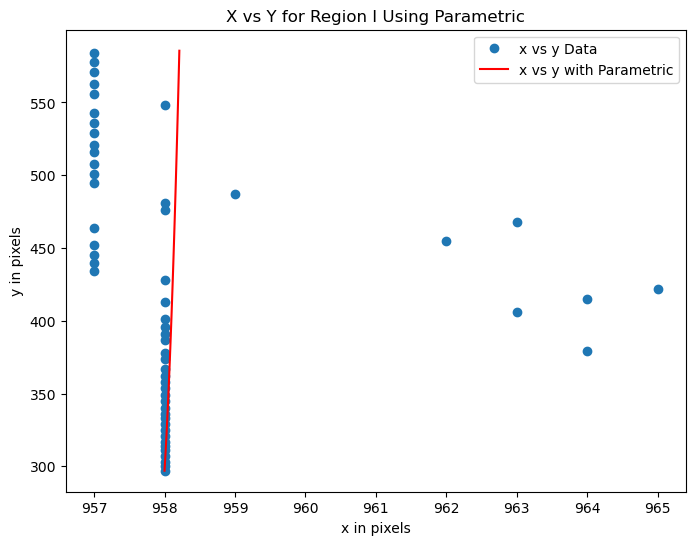

In [78]:
plt.plot(X, Y, "o", label="x vs y Data")
title = "X vs Y for Region I Using Parametric"
plt.plot(parametric_x_vector(tbar, *poptx), parametric_y_vector(tbar, *popty), "r", label="x vs y with Parametric")
plt.legend()
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.show()


#### Speeds


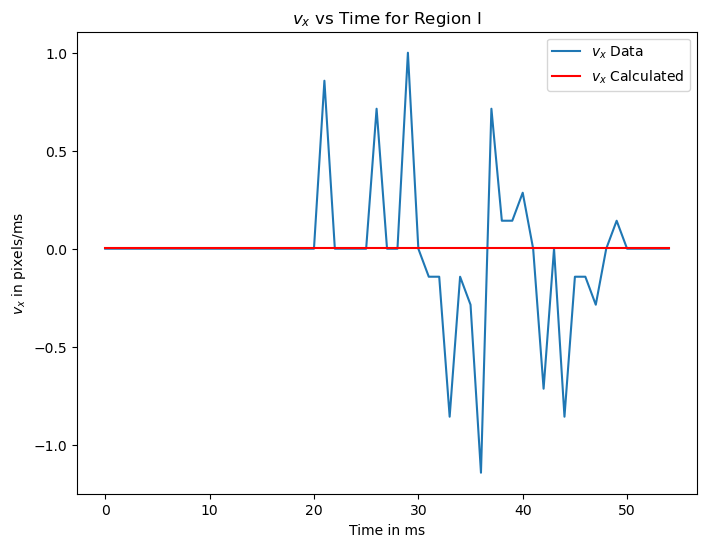

In [79]:
plt.plot(tbar, region_1["vx"].values, label="$v_x$ Data")
title = "$v_x$ vs Time for Region I"
plt.plot(tbar, vx, "r", label="$v_x$ Calculated")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("$v_x$ in pixels/ms")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_").replace("$", "") + ".png"
plt.savefig(save_name)
plt.show()


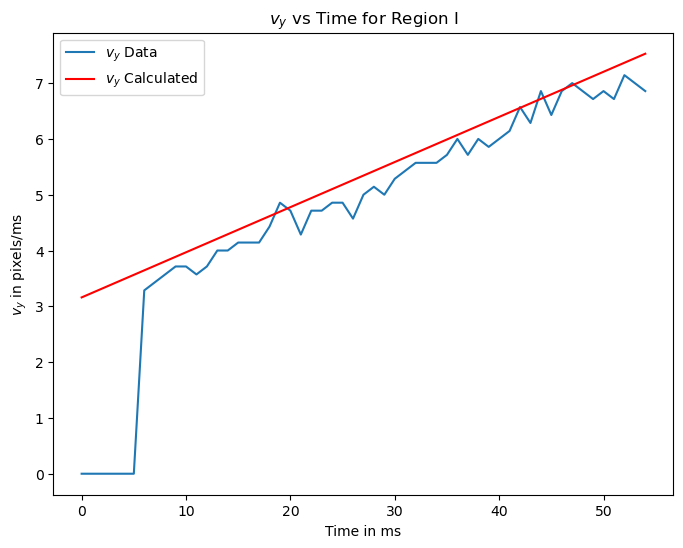

In [80]:
plt.plot(tbar, region_1["vy"].values, label="$v_y$ Data")
title = "$v_y$ vs Time for Region I"
plt.plot(tbar, vy, "r", label="$v_y$ Calculated")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("$v_y$ in pixels/ms")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_").replace("$", "") + ".png"
plt.savefig(save_name)
plt.show()


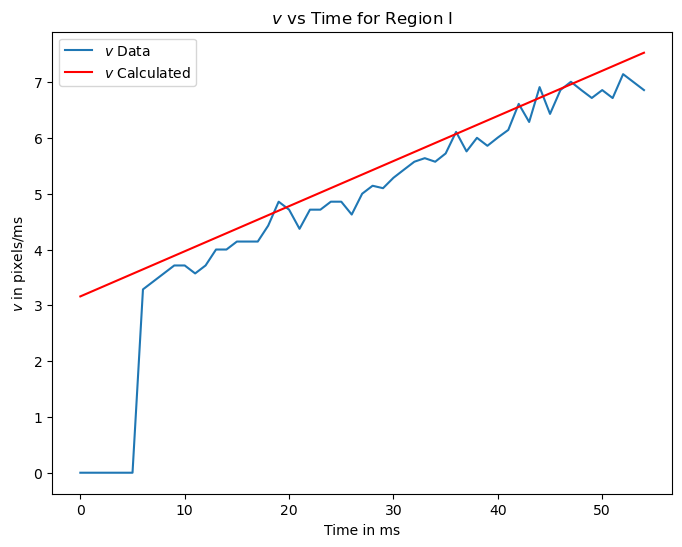

In [81]:
plt.plot(tbar, region_1["v"].values, label="$v$ Data")
title = "$v$ vs Time for Region I"
plt.plot(tbar, v, "r", label="$v$ Calculated")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("$v$ in pixels/ms")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_").replace("$", "") + ".png"
plt.savefig(save_name)
plt.show()


#### Angle


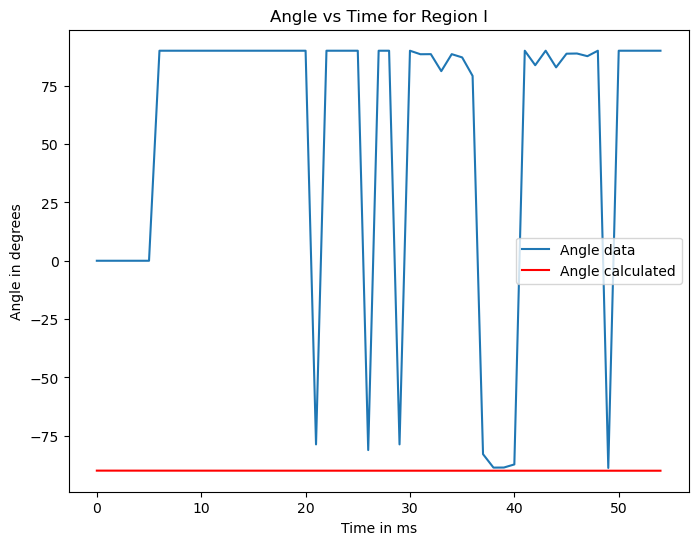

In [82]:
plt.plot(region_1["angle"].values, label="Angle data")
title = "Angle vs Time for Region I"
plt.plot(-angles, "r", label="Angle calculated")
plt.xlabel("Time in ms")
plt.ylabel("Angle in degrees")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.legend()
plt.show()


### Getting The Required Informations


In [83]:
fps = 1000
pixels = 0.011914
speed_conversion = pixels * fps
acceleration_conversion = pixels * fps**2
g_raw = popty[1]
g_in_region_1 = g_raw * acceleration_conversion
g_in_region_1


963.5008337339685

In [84]:
x_velocity_at_contact_frame_using_c = vx[-1]
y_velocity_at_contact_frame_using_c = vy[-1]
velocity_at_contact_frame_using_c = v[-1]
angle_at_contact_frame_using_c = angles[-1]
x_velocity_at_contact_frame_using_c, y_velocity_at_contact_frame_using_c, velocity_at_contact_frame_using_c, angle_at_contact_frame_using_c


(0.003892132330327036, 7.526781807657671, 7.526782813977068, 89.97037210036692)

In [85]:
h_using_c = Y[-1] - Y[0]
h_using_c


287.0

In [86]:
if angle_at_contact_frame_using_c < 0:
    angle_at_contact_frame_using_c = angle_at_contact_frame_using_c + 180


In [87]:
new_info_df_for_region_1 = pd.DataFrame(
    {"vx": vx, "vy": vy, "v": v, "angle": angles, "time": t}
)
new_info_df_for_region_1.columns = [
    "vx_using_curve",
    "vy_using_curve",
    "v_using_curve",
    "angle_using_curve",
    "time",
]


# Adding the Additional Information


## Saving Informations to DataFrame


In [88]:
info_df = pd.concat([new_info_df_for_region_1, new_info_df_for_region_3], axis=0)


In [89]:
df_final = pd.merge(df_c, info_df, on="time", how="left")
df_final.head()


id      x      y   r1   r2  \
0  ../../data/extracted_images/theta6_pass/000.jpg  958.0  294.0  8.0  9.0   
1  ../../data/extracted_images/theta6_pass/001.jpg  958.0  297.0  9.0  9.0   
2  ../../data/extracted_images/theta6_pass/002.jpg  958.0  300.0  9.0  9.0   
3  ../../data/extracted_images/theta6_pass/003.jpg  958.0  303.0  9.0  8.0   
4  ../../data/extracted_images/theta6_pass/004.jpg  958.0  307.0  8.0  9.0   

        theta Region  time   vx   vy    v  angle  vx_using_curve  \
0   31.512679      O     0  0.0  0.0  0.0    0.0             NaN   
1   37.242257      I     1  0.0  0.0  0.0    0.0        0.003892   
2   17.188734      I     2  0.0  0.0  0.0    0.0        0.003892   
3  113.445643      I     3  0.0  0.0  0.0    0.0        0.003892   
4   57.295780      I     4  0.0  0.0  0.0    0.0        0.003892   

   vy_using_curve  v_using_curve  angle_using_curve  
0             NaN            NaN                NaN  
1        3.159731       3.159733          89.929424  
2        3.240602       3.240605          89.931185  
3        3.321473       3.321476          89.932860  
4        3.402345       3.402347          89.934456

## The Text Information


### Creating the Text


In [90]:
pattern = "***"
information = f"""
{pattern*20}
### TOTAL FRAMES: {total_frames}
### NONE FRAMES: {none_frames}
### UNREALISTIC FRAMES: {unrealistic}
### PASSTHROUGH: {passthrough}

{pattern*20}
USING THE SMOOTHENED DATA
AT CONTACT FRAME:
### H: {np.round(hs, 1)}
### ANGLE: {np.round(-90+angle_at_contact_frame_s+float(angle), 2)}
### VELOCITY: {np.round(velocity_at_contact_frame_s, 2)}
### X VELOCITY: {np.round(x_velocity_at_contact_frame_s, 2)}
### Y VELOCITY: {np.round(y_velocity_at_contact_frame_s, 2)}

AT LEAVE FRAME:
### ANGLE: {np.round(angle_at_leave_frame_s, 2)}
### VELOCITY: {np.round(velocity_at_leave_frame_s, 2)}
### X VELOCITY: {np.round(x_velocity_at_leave_frame_s, 2)}
### Y VELOCITY: {np.round(y_velocity_at_leave_frame_s, 2)}

{pattern*20}
USING THE RAW DATA
AT CONTACT FRAME:
### H: {np.round(hc, 1)}
### ANGLE: {np.round(-90+angle_at_contact_frame_c+float(angle), 2)}
### VELOCITY: {np.round(velocity_at_contact_frame_c, 2)}
### X VELOCITY: {np.round(x_velocity_at_contact_frame_c, 2)}
### Y VELOCITY: {np.round(y_velocity_at_contact_frame_c, 2)}

AT LEAVE FRAME:
### ANGLE: {np.round(angle_at_leave_frame_c, 2)}
### VELOCITY: {np.round(velocity_at_leave_frame_c, 2)}
### X VELOCITY: {np.round(x_velocity_at_leave_frame_c, 2)}
### Y VELOCITY: {np.round(y_velocity_at_leave_frame_c, 2)}

{pattern*20}
USING CURVE FITTING
AT CONTACT FRAME:
### H: {np.round(h_using_c, 1)}
### ANGLE: {np.round(-90+angle_at_contact_frame_using_c+float(angle), 2)}
### VELOCITY: {np.round(velocity_at_contact_frame_using_c, 2)}
### X VELOCITY: {np.round(x_velocity_at_contact_frame_using_c, 2)}
### Y VELOCITY: {np.round(y_velocity_at_contact_frame_using_c, 2)}
### g: {np.round(g_in_region_1, 2)}

AT LEAVE FRAME:
### ANGLE: {np.round(-angle_at_leave_frame_using_c, 2)}
### VELOCITY: {np.round(velocity_at_leave_frame_using_c, 2)}
### X VELOCITY: {np.round(x_velocity_at_leave_frame_using_c, 2)}
### Y VELOCITY: {np.round(y_velocity_at_leave_frame_using_c, 2)}
### g: {np.round(g_in_region_3, 2)}
"""
print(information)



************************************************************
### TOTAL FRAMES: 121
### NONE FRAMES: 29
### UNREALISTIC FRAMES: 7
### PASSTHROUGH: 1

************************************************************
USING THE SMOOTHENED DATA
AT CONTACT FRAME:
### H: 297.7
### ANGLE: 46.89
### VELOCITY: 7.88
### X VELOCITY: 0.12
### Y VELOCITY: 7.88

AT LEAVE FRAME:
### ANGLE: -32.7
### VELOCITY: 6.54
### X VELOCITY: 5.5
### Y VELOCITY: 3.53

************************************************************
USING THE RAW DATA
AT CONTACT FRAME:
### H: 290.0
### ANGLE: 46.0
### VELOCITY: 6.86
### X VELOCITY: 0.0
### Y VELOCITY: 6.86

AT LEAVE FRAME:
### ANGLE: -26.03
### VELOCITY: 6.84
### X VELOCITY: 6.14
### Y VELOCITY: 3.0

************************************************************
USING CURVE FITTING
AT CONTACT FRAME:
### H: 287.0
### ANGLE: 45.97
### VELOCITY: 7.53
### X VELOCITY: 0.0
### Y VELOCITY: 7.53
### g: 963.5

AT LEAVE FRAME:
### ANGLE: -46.24
### VELOCITY: 8.25
### X VELOCITY: 5.7


First, create a new string containing just the previous text file. Else we'll duplicate the text file.


In [91]:
with open(RESULT_DIR + "/info.txt", "r+") as f:
    texts = f.readlines()
    text = "".join(texts[:6])
print(text[:125])
all_text = text + information


### theta6_pass.tif
### First Frame ID: 000
### Last Frame ID: 092
### Contact Frame ID: 055 
### Leave Frame ID: 085
### Ang


In [92]:
with open(RESULT_DIR + "/info.txt", "w") as f:
    f.writelines(all_text)


### Save the DataFrames


In [93]:
df_final.to_csv(RESULT_DIR + f"/{sequence}_final.csv", index=False)
df_s.to_csv(RESULT_DIR + f"/{sequence}_smoothened.csv", index=False)
df_c.to_csv(RESULT_DIR + f"/{sequence}_raw.csv", index=False)
